# The purpose of this script is to extract top keywords from a PDF style document

Use case: 
<br>
-Understand content of report / document
<br>
-Derive keywords for SEO
<br>
-Display relevant material to show for user when searching for a particlar document on a website
<br>
-Keywords can help analyze a paper in a greater qualitative context<br>
-Detrive keywords for sentiment analysis

In [66]:
import PyPDF4
import re
import matplotlib.pyplot as plt
from collections import Counter

In [67]:
# Read pdf document
with open('2020-tesla-impact-report.pdf', 'rb') as file:
    read = PyPDF4.PdfFileReader(file)
    total_pages = read.numPages
    text = ""

    # Loop through pdf and extract text from each page
    for page_number in range(total_pages):
        page = read.getPage(page_number)
        text += page.extractText()
    
    # Store individual text items into list
    text_list = text.split()

In [68]:
# Organize word data 
text_list_remove_punc = []
stopwords = ['', '&', 'A', 'Across', 'All', 'Also', 'An', 'And', 'Are', 'As', 'At', 'Be', 'By', 'Can', 'Do', 'For', 
                'From', 'Has', 'Have', 'How', 'In', 'Include', 'Including', 'Is', 'It', 'Its', 'May', 'More', 'Not', 'Of', 
                'On', 'Or', 'Other', 'Our', 'Over', 'RBC', 'Rbc', 'Such', 'Than', 'That', 'The', 'Their', 'These', 'They', 
                'This', 'Through', 'To', 'Us', 'Was', 'We', 'Were', 'Where', 'Which', 'Who', 'Will', 'With', 'a', 'across', 
                'all', 'also', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'can', 'do', 'for', 'from', 'has', 'have', 'how', 
                'in', 'include', 'including', 'is', 'it', 'its', 'may', 'more', 'not', 'of', 'on', 'or', 'other', 'our', 'over', 
                'such', 'than', 'that', 'the', 'their', 'these', 'they', 'this', 'through', 'to', 'us', 'was', 'we', 'were', 'where', 
                'which', 'who', 'will', 'with', 'Œ']

# Remove all punctuation from string in list
for i in text_list:
    new_string = re.sub(r'[^\w\s]', '', i)
    text_list_remove_punc.append(new_string)

# Clear the original text_list list
text_list.clear()

# Remove common words and instances of integers in list
for i, x in enumerate(text_list_remove_punc):
    if (x not in stopwords) and (not x.isdigit()) and (len(x) > 2):
        text_list.append(x.capitalize())

In [69]:
# Organize keywords
keywords = []
frequencies = []

# Find most common word w/ frequency
Counter = Counter(text_list)
most_repeated = Counter.most_common(20)


for i in most_repeated:
    keywords.append(i[0])
    frequencies.append(i[1])
    
print('Keywords:', len(keywords))
print('Frequencies:', len(frequencies))

Keywords: 20
Frequencies: 20


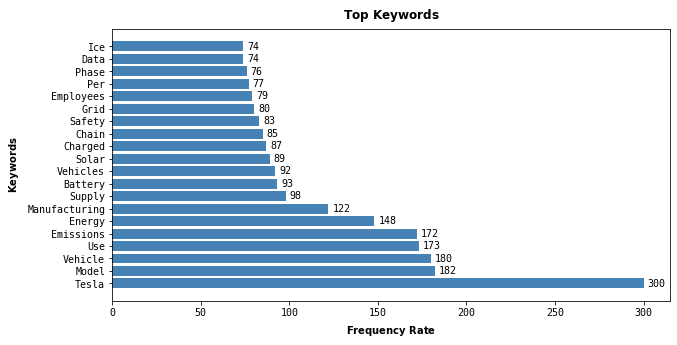

In [70]:
# Plot results into bar chart

# Change font
plt.rcParams.update({'font.family':'monospace'})

# Add data to graph
fig, ax = plt.subplots(figsize = (10, 5))
bars = ax.barh(keywords, frequencies, color = ('steelblue'))

# Add value labels
ax.bar_label(bars, padding = 4)

# Label title / x-axis / y-axis
plt.title(r"$\bf{" + str("Top \ Keywords") + "}$", fontsize = 12, pad = 10)
plt.xlabel(r"$\bf{" + str("Frequency \ Rate") + "}$", fontsize = 10, labelpad = 6)
plt.ylabel(r"$\bf{" + str("Keywords") + "}$", fontsize = 10, labelpad = 6)

# Set size of graph
plt.show()